In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = 'SimHei' #设置中文显示
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_csv('boss直聘.csv',encoding='gbk')
print(df.head())

          岗位          地点      薪资   工作经验  学历    公司名称  \
0  增长营销数据分析师  北京·海淀区·双榆树  30-60K   经验不限  本科  北京字节跳动   
1      数据分析师   北京·海淀区·清河  25-35K  5-10年  本科     一亩田   
2      数据分析师   北京·海淀区·清河  14-15K   3-5年  本科      小米   
3      数据分析师  北京·海淀区·五道口  15-30K   1-3年  本科  紫光教育科技   
4      数据分析师  北京·海淀区·双榆树  25-45K   3-5年  本科      腾讯   

                                               技能  \
0  ['Python', 'SQL', 'Excel', 'Tableau', '数据分析师']   
1                        ['数据分析', 'SQL', 'Excel']   
2           ['SQL', '大数据', '商业智能', '物联网', '数据分析']   
3                                        ['数据分析']   
4           ['数据分析', '数据仓库', '数据开发', 'SQL', 'BI']   

                                                工作福利   工作类型      公司规模  
0  股票期权，带薪年假，节日福利，零食下午茶，年终奖，五险一金，住房补贴，免费健身房，嘀嘀打车，...  移动互联网  10000人以上  
1  五险一金，全勤奖，住房补贴，节日福利，定期体检，补充医疗保险，股票期权，零食下午茶，年终奖，...     O2  500-999人  
2      定期体检，年终奖，五险一金，餐补，节日福利，股票期权，补充医疗保险，12%公积金，带薪年假    互联网  10000人以上  
3                         节日福利，定期体检，年终奖，包吃，带薪年假，五险一金  计算机软件  1

In [3]:
print(df.tail())

                 岗位           地点      薪资  工作经验    学历        公司名称  \
10225      iOs开发工程师  重庆·南岸区·茶园新区   8-12K  1-3年    本科         沙师弟   
10226     孩子王招聘卖场经理  重庆·沙坪坝区·陈家桥    4-6K  1-3年    大专         孩子王   
10227       家装设计部经理    重庆·巴南区·鱼洞  12-15K  3-5年  学历不限       美之乐装饰   
10228  小学数学老师（巴南校区）   重庆·巴南区·龙洲湾   6-10K  1年以内    大专  重庆南西科技培训公司   
10229       预算员（装饰）  重庆·大渡口区·九宫庙   8-12K  3-5年    大专     赛德纳文化传媒   

                                              技能  \
10225  ['网络协议', 'Xcode', 'Objective-C', 'Swift']   
10226                           ['五险一金', '月休四天']   
10227    ['酷家乐', 'CAD', '3DMax', '设计经理', '设计主管']   
10228                       ['教研', '教育培训', '数学']   
10229        ['广联达', '精装修', '装饰', '预结算', '工程造价']   

                                             工作福利      工作类型      公司规模  
10225  员工旅游，通讯补贴，股票期权，年终奖，加班补助，交通补助，节日福利，全勤奖，带薪年假       互联网  100-499人  
10226             餐补，年终奖，节日福利，员工旅游，定期体检，带薪年假，五险一金       互联网  10000人以上  
10227              通讯补贴，节日福利，年终奖，员工旅游，补充医疗保险，带薪年假      装修装饰   

In [4]:
print(df.shape)

(10230, 10)


In [5]:
a= df.groupby(by = ['公司名称']).count()[['岗位']]
a=a.reset_index()
a=a.sort_values(by='岗位',ascending=False)
print(a)

           公司名称   岗位
1145         华为  141
2381         捷普  132
672        京东集团  124
1041     北京字节跳动   97
1149   华为技术有限公司   76
...         ...  ...
1883         富典    1
1884        富士康    1
1885        富安娜    1
1887  富明精密(连接器)    1
4928       龙麦实业    1

[4929 rows x 2 columns]


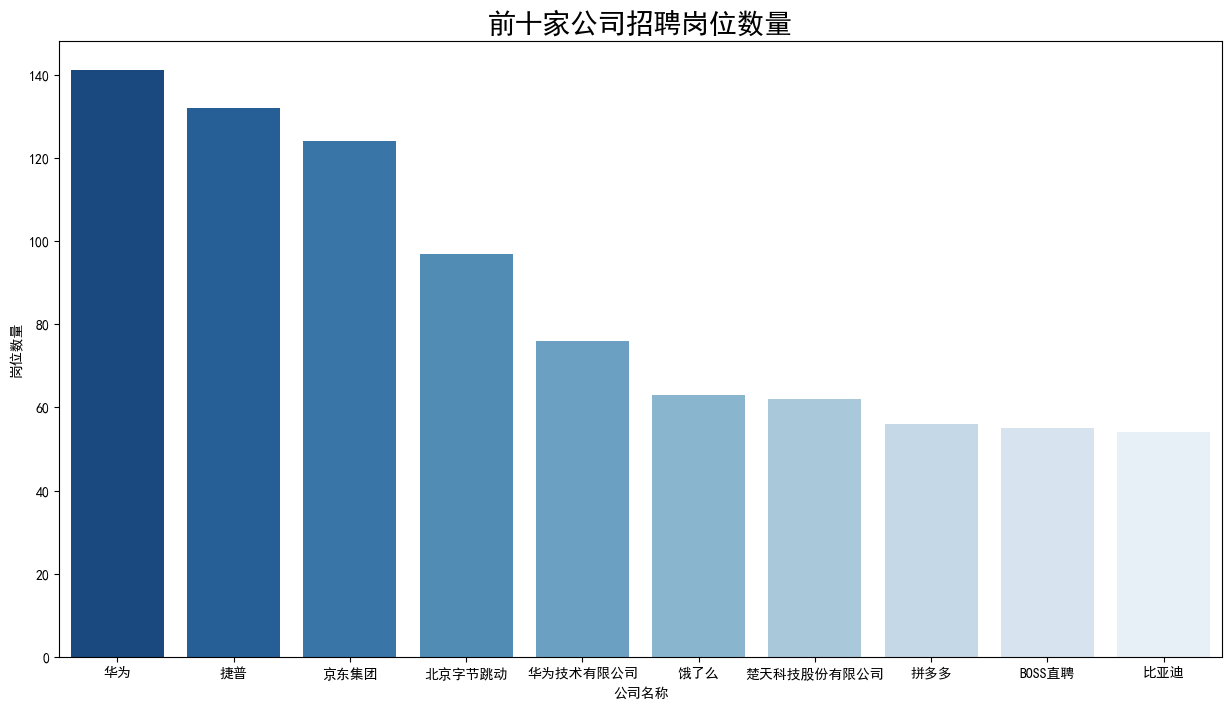

In [19]:
#得出需求岗位数量最多的前十的公司
figure=plt.figure(figsize=(15,8))
b=a.head(10)
c=sns.barplot(x='公司名称',y='岗位',data=b,palette="Blues_r")
plt.title('前十家公司招聘岗位数量',fontsize=20)
plt.ylabel('岗位数量')
plt.savefig('前十家公司招聘岗位数量.png')
plt.show()

In [20]:
#学历要求分布
d=df.groupby(by=['学历']).count()[['岗位']]
d=d.reset_index()
print(d)

      学历    岗位
0  中专/中技   152
1  初中及以下    10
2     博士    38
3     大专  2487
4   学历不限   534
5     本科  6358
6     硕士   524
7     高中   127


In [21]:
arr1=np.array(d.loc[:,'学历'])
arr2=np.array(d.loc[:,'岗位'])
print(arr1)
print(arr2)

['中专/中技' '初中及以下' '博士' '大专' '学历不限' '本科' '硕士' '高中']
[ 152   10   38 2487  534 6358  524  127]


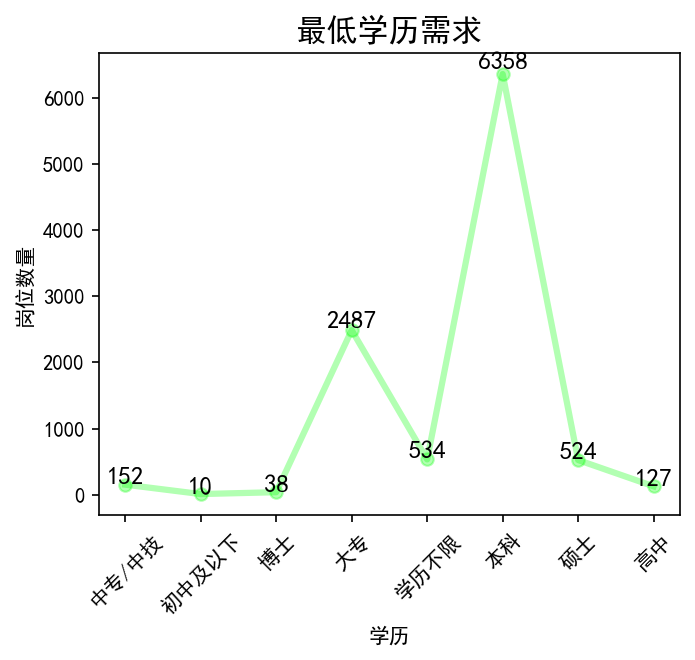

In [23]:
figure=plt.figure(figsize=(5,4),dpi=150)
plt.xticks(rotation=45) 
plt.plot(arr1,arr2,c='#00FF00',linewidth=3,marker='o',alpha=0.3)
plt.title('最低学历需求',fontsize=15)
plt.xlabel('学历')
plt.ylabel('岗位数量')
edu = arr1
count = arr2
for i in range(len(edu)):
    plt.text(edu[i], count[i]*1.01, count[i], fontsize=12,ha='center')
plt.savefig('最低学历需求.png')
plt.show()

In [24]:
print(df['薪资'])

0        30-60K
1        25-35K
2        14-15K
3        15-30K
4        25-45K
          ...  
10225     8-12K
10226      4-6K
10227    12-15K
10228     6-10K
10229     8-12K
Name: 薪资, Length: 10230, dtype: object


In [25]:
df['最低薪资'] = df['薪资'].apply(lambda x : int(x.split('-')[0]) if len(x.split('-')[0])<4 else int(x.split('-')[0])/1000)
print(df['最低薪资'])

0        30.0
1        25.0
2        14.0
3        15.0
4        25.0
         ... 
10225     8.0
10226     4.0
10227    12.0
10228     6.0
10229     8.0
Name: 最低薪资, Length: 10230, dtype: float64


<Figure size 2000x500 with 0 Axes>

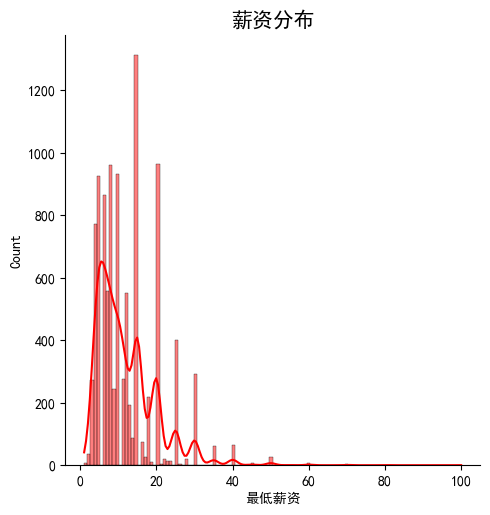

In [26]:
figure=plt.figure(figsize=(20,5))
e=sns.displot(data=df,x='最低薪资',kde=True,color='red')
plt.title('薪资分布',fontsize=15)
plt.savefig('薪资分布.png')
plt.show()

In [27]:
f=df[['公司规模','最低薪资']].groupby(by='公司规模').mean()
print(f)

                 最低薪资
公司规模                 
0-20人        7.536264
100-499人    10.874134
1000-9999人  13.377233
10000人以上    15.517110
20-99人       8.938858
500-999人    12.512048


In [28]:
f=f.reset_index()
print(f)

         公司规模       最低薪资
0       0-20人   7.536264
1    100-499人  10.874134
2  1000-9999人  13.377233
3    10000人以上  15.517110
4      20-99人   8.938858
5    500-999人  12.512048


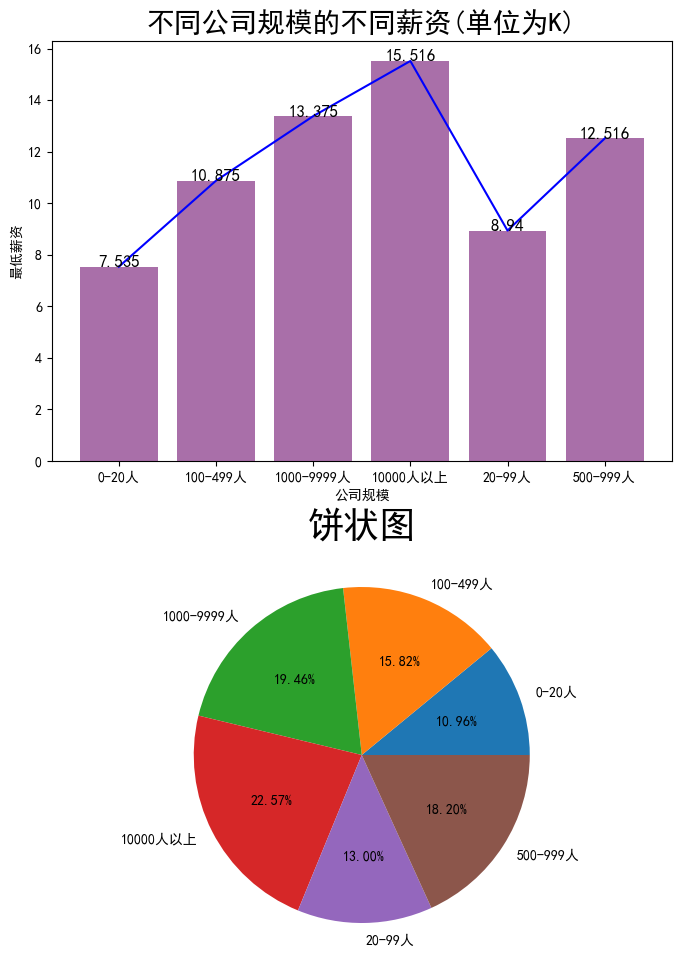

In [29]:
g=plt.figure(figsize=(8,12))
h=g.add_subplot(2,1,1)
sns.barplot(data=f,x='公司规模',y='最低薪资',color='purple',alpha=0.6)
sns.lineplot(data=f,x='公司规模',y='最低薪资',color='blue')
plt.title('不同公司规模的不同薪资(单位为K)',fontsize=20)
arr3=np.array(f.loc[:,'公司规模'])
arr4=np.array(f.loc[:,'最低薪资'])
arr5=arr4.astype('float16')
for i in range(len(arr3)):
    plt.text(arr3[i],arr5[i],arr5[i],fontsize=12,ha='center')
j=g.add_subplot(2,1,2)
plt.title('饼状图',fontsize=26)
plt.pie(arr4,labels=arr3,autopct='%0.2f%%')
plt.savefig('不同公司规模的不同薪资(单位为K).png')
plt.savefig('饼状图.png')
plt.show()

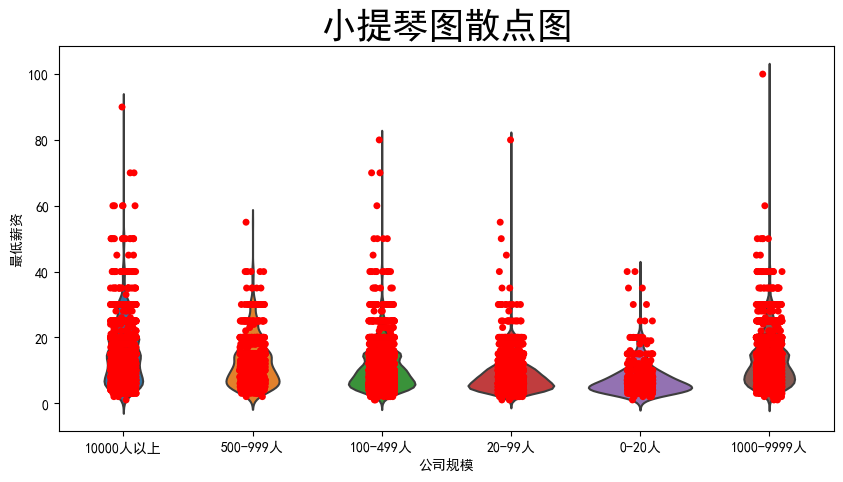

In [32]:
k=plt.figure(figsize=(10,5))
sns.violinplot(x="公司规模", y="最低薪资", data=df, inner=None)
#plt.title('小提琴图',fontsize=26)
sns.stripplot(x="公司规模", y="最低薪资", data=df,jitter=True, color="r")
#plt.title('散点图',fontsize=26)
plt.title('小提琴图散点图',fontsize=26)
plt.savefig('小提琴散点图.png')
plt.show()

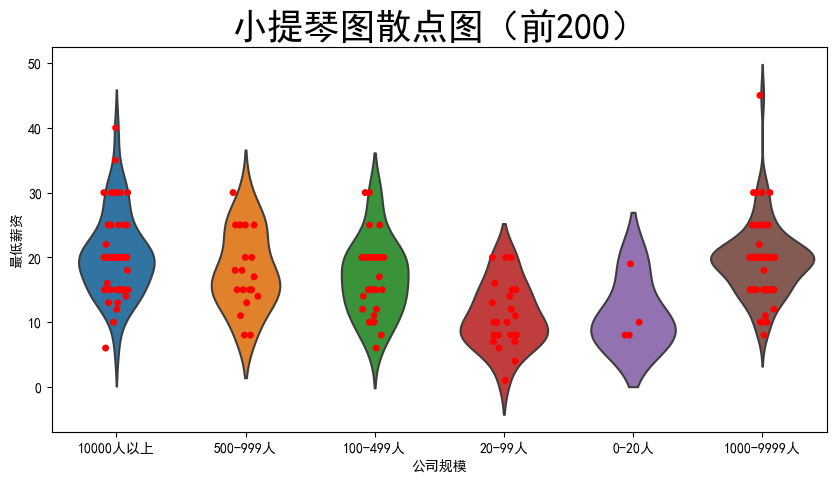

In [33]:
l=plt.figure(figsize=(10,5))
dff=df.loc[0:200,:]
sns.violinplot(x="公司规模", y="最低薪资", data=dff, inner=None)
sns.stripplot(x="公司规模", y="最低薪资", data=dff,jitter=True, color="r")
plt.title('小提琴图散点图（前200）',fontsize=26)
plt.savefig('小提琴图散点图（前200）.png')
plt.show()